In [31]:
# import modules libraries in this section:
import pyodbc
import pandas as pd
#import statsmodels.api as sm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import warnings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

import os
warnings.filterwarnings('ignore')

In [32]:
air = pd.read_csv('C:\\Users\\Win 1809 UEFI\\Desktop\\9999.csv')

In [33]:
air.head(1)

,airline,Type_Of_Traveller,seat_type,Seat_Comfort,Cabin_Staff,Food_Beverages,Inflight_Entertainment,Ground_Service,Wifi_Connectivity,Value_Money,Recommended,airline_sentiment,overall_rating,title,review
0,Saudi Arabian,Family Leisure,Economy Class,4.0,3.0,1.0,NaN,4.0,NaN,4,1,Neutral,6,poor inflight meal,Saudi Arabian Airlines flight from Medina to R...


In [34]:
df = air
print(df.shape,'\n')
print(df.columns,'\n')
print(df.dtypes,'\n')

(4932, 15) 

Index(['airline', 'Type_Of_Traveller', 'seat_type', 'Seat_Comfort',
       'Cabin_Staff', 'Food_Beverages', 'Inflight_Entertainment',
       'Ground_Service', 'Wifi_Connectivity', 'Value_Money', 'Recommended',
       'airline_sentiment', 'overall_rating', 'title', 'review'],
      dtype='object') 

airline                    object
Type_Of_Traveller          object
seat_type                  object
Seat_Comfort              float64
Cabin_Staff               float64
Food_Beverages            float64
Inflight_Entertainment    float64
Ground_Service            float64
Wifi_Connectivity         float64
Value_Money                 int64
Recommended                 int64
airline_sentiment          object
overall_rating              int64
title                      object
review                     object
dtype: object 



-----

#Imputing missing values, dummy-coding columns, dropna to drop null values row, drop duplicates if any, drop irrelevant features

In [35]:
print("Total number of reviews for each airline \n ",df.groupby('airline')['airline_sentiment'].count().sort_values(ascending=False))

Total number of reviews for each airline 
  airline
Emirates                    1189
Turkish Airlines            1051
Qatar Airways               1023
Etihad Airways               843
Oman Air                     177
Flydubai                     141
Kuwait Airways               140
Saudi Arabian                128
Royal Jordanian Airlines     121
Gulf Air                     119
Name: airline_sentiment, dtype: int64


In [36]:
# Identify null values 
df.isnull().sum()

airline                      0
Type_Of_Traveller            0
seat_type                    0
Seat_Comfort                73
Cabin_Staff                 78
Food_Beverages             263
Inflight_Entertainment     521
Ground_Service              35
Wifi_Connectivity         2664
Value_Money                  0
Recommended                  0
airline_sentiment            0
overall_rating               0
title                        0
review                       0
dtype: int64

In [37]:
print("Percentage null or na values in df")
((df.isnull() | df.isna()).sum() * 100 / df.index.size).round(2)

Percentage null or na values in df


airline                    0.00
Type_Of_Traveller          0.00
seat_type                  0.00
Seat_Comfort               1.48
Cabin_Staff                1.58
Food_Beverages             5.33
Inflight_Entertainment    10.56
Ground_Service             0.71
Wifi_Connectivity         54.01
Value_Money                0.00
Recommended                0.00
airline_sentiment          0.00
overall_rating             0.00
title                      0.00
review                     0.00
dtype: float64

In [38]:
# Impute median 3 as a neutral score for empty rating ranging from 1-5. 
df['Seat_Comfort'].fillna(3.0,inplace=True)
df['Cabin_Staff'].fillna(3.0,inplace=True)
df['Food_Beverages'].fillna(3.0,inplace=True) 
df['Inflight_Entertainment'].fillna(3.0,inplace=True)
df['Ground_Service'].fillna(3.0,inplace=True)
df['Wifi_Connectivity'].fillna(3.0,inplace=True)
df['Value_Money'].fillna(3.0,inplace=True)          

In [39]:
# change recommended value from True or False to 1 or 0 
df_recomm = pd.get_dummies(df['Recommended'], drop_first=True)
df_recomm.columns = ['Recommended']

In [40]:
# concatenate all 3 dataframes together
df = pd.concat([df, df_recomm], axis=1)

In [41]:
# drop irrelevant columns and featured columns that had been dummy-coded. 
df.drop(columns=['title','airline_sentiment'],axis=1,inplace=True)

In [42]:
# drops any row with null/Nan values as well as drops any duplicate (if exist)
df.dropna(inplace=True)
df.drop_duplicates() 

,airline,Type_Of_Traveller,seat_type,Seat_Comfort,Cabin_Staff,Food_Beverages,Inflight_Entertainment,Ground_Service,Wifi_Connectivity,Value_Money,Recommended,overall_rating,review,Recommended
0,Saudi Arabian,Family Leisure,Economy Class,4.0,3.0,1.0,3.0,4.0,3.0,4,1,6,Saudi Arabian Airlines flight from Medina to R...,1
1,Saudi Arabian,Business,Economy Class,4.0,5.0,4.0,3.0,4.0,3.0,4,1,8,I fly regularly between Dubai and Riyadh but t...,1
2,Saudi Arabian,Solo Leisure,Economy Class,3.0,4.0,5.0,2.0,2.0,3.0,4,0,6,Damman to Dubai in economy class with Saudi Ar...,0
3,Saudi Arabian,Couple Leisure,Economy Class,4.0,5.0,4.0,3.0,4.0,3.0,4,1,9,"Istanbul to Johannesburg via Jeddah, and Saudi...",1
4,Saudi Arabian,Family Leisure,Economy Class,2.0,3.0,3.0,2.0,4.0,3.0,3,0,6,Kuala Lumpur to Jeddah with Saudi Arabian Airl...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4927,Turkish Airlines,Business,Economy Class,3.0,3.0,2.0,3.0,1.0,3.0,2,0,1,Berlin to Erbil via Istanbul. Over two hours...,0
4928,Turkish Airlines,Family Leisure,Economy Class,2.0,1.0,2.0,1.0,1.0,3.0,1,0,1,London Gatwick - Istanbul - Tashkent Departed...,0
4929,Turkish Airlines,Couple Leisure,Economy Class,3.0,1.0,3.0,3.0,1.0,2.0,3,0,4,"Amsterdam to Abu Dhabi via Istanbul. Delays,...",0
4930,Turkish Airlines,Family Leisure,Economy Class,1.0,1.0,1.0,2.0,1.0,3.0,1,0,2,Istanbul to Johannesburg. Our flight on 30 D...,0


In [43]:
df['Ground_Service'] = df['Ground_Service'].astype('float')
df['Wifi_Connectivity'] = df['Wifi_Connectivity'].astype('float')
df['Value_Money'] = df['Value_Money'].astype('float')
df['overall_rating'] = df['overall_rating'].astype('float')
df['seat_type'] = df['seat_type'].astype('object')
df['airline'] = df['airline'].astype('object')

In [44]:
print(df.columns)
print(df.isnull().sum())
df.shape

Index(['airline', 'Type_Of_Traveller', 'seat_type', 'Seat_Comfort',
       'Cabin_Staff', 'Food_Beverages', 'Inflight_Entertainment',
       'Ground_Service', 'Wifi_Connectivity', 'Value_Money', 'Recommended',
       'overall_rating', 'review', 'Recommended'],
      dtype='object')
airline                   0
Type_Of_Traveller         0
seat_type                 0
Seat_Comfort              0
Cabin_Staff               0
Food_Beverages            0
Inflight_Entertainment    0
Ground_Service            0
Wifi_Connectivity         0
Value_Money               0
Recommended               0
overall_rating            0
review                    0
Recommended               0
dtype: int64


(4932, 14)

In [45]:
df.dtypes

airline                    object
Type_Of_Traveller          object
seat_type                  object
Seat_Comfort              float64
Cabin_Staff               float64
Food_Beverages            float64
Inflight_Entertainment    float64
Ground_Service            float64
Wifi_Connectivity         float64
Value_Money               float64
Recommended                 int64
overall_rating            float64
review                     object
Recommended                 uint8
dtype: object

In [46]:
labelencoder = LabelEncoder()
df['airline'] = labelencoder.fit_transform(df['airline'])

In [47]:
df['cabin_class'] = df['seat_type']
# create dummy-coded columns for cabin class types
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['seat_type'] = labelencoder.fit_transform(df['seat_type'])

In [48]:
df['cabin_class'].value_counts()

Economy Class     3482
Business Class    1360
First Class         90
Name: cabin_class, dtype: int64

In [49]:
df['seat_type'].value_counts()

1    3482
0    1360
2      90
Name: seat_type, dtype: int64

#  correlation analysis

In [50]:
# define a method for charting a correlation heat map: 

def correlation_heat_map(df):
    corrs = df.corr()

    # Set the default matplotlib figure size:
    fig, ax = plt.subplots(figsize=(11,7))

    # Generate a mask for the upper triangle (taken from seaborn example gallery)
    mask = np.zeros_like(corrs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Plot the heatmap with seaborn.
    # Assign the matplotlib axis the function returns. This will let us resize the labels.
    ax = sns.heatmap(corrs, mask=mask, annot=True)

    # Resize the labels.
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=90)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)

    # If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
    plt.show()

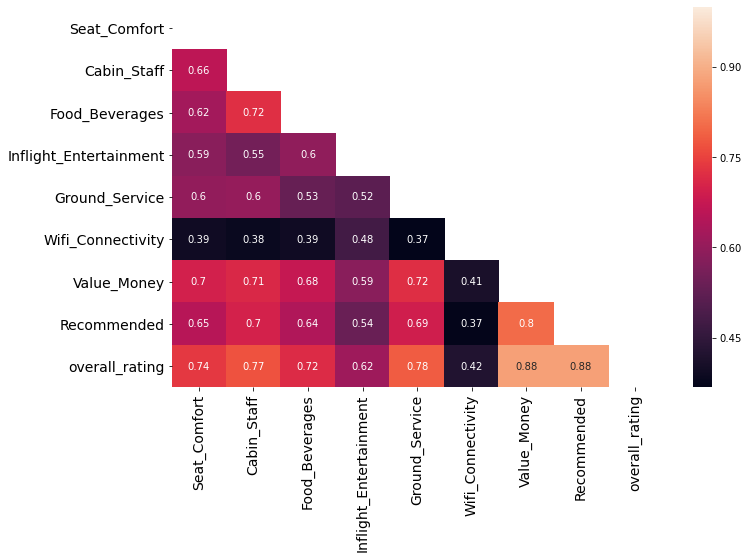

In [51]:
correlation_heat_map(air)